In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from datetime import datetime
import seaborn as sns
import warnings
from sklearn import*
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
import pyodbc

warnings.filterwarnings('ignore')

In [5]:
server = 'sql5109.site4now.net' 
database = 'db_a7efcb_atasenturk' 
username = 'db_a7efcb_atasenturk_admin' 
password = 'ata45ata' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM sleepdata$
                               ''', cnxn)

df = pd.DataFrame(sql_query, columns = ['Start','End','Sleep quality','Time in bed','Wake up','Sleep notes','Heart rate','Activity (steps)'])
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:00,2014-12-30 07:30:00,100.0,08:32,:),NaN,59.0,10545.0
1,2014-12-30 21:17:00,2014-12-30 21:33:00,3.0,00:16,:|,NaN,72.0,9349.0
2,2014-12-30 22:42:00,2014-12-31 07:13:00,98.0,08:30,:|,NaN,57.0,7922.0
3,2014-12-31 22:31:00,2015-01-01 06:03:00,65.0,07:32,None,NaN,72.0,13966.0
4,2015-01-01 22:12:00,2015-01-02 04:56:00,72.0,06:44,:),NaN,68.0,684.0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:00,2018-02-13 07:02:00,91.0,09:08,None,NaN,89.0,56.0
883,2018-02-13 23:49:00,2018-02-14 07:00:00,81.0,07:11,None,NaN,63.0,64.0
884,2018-02-14 21:24:00,2018-02-15 06:20:00,71.0,08:56,None,NaN,60.0,3316.0
885,2018-02-15 21:36:00,2018-02-16 06:50:00,80.0,09:13,None,NaN,90.0,6555.0


# Data Analysis

In [7]:
df.columns = ['Start','End','Sleep_quality','Time_in_bed','Wake_up','Sleep_notes','Heart_rate','Activity']


In [8]:
df

,Start,End,Sleep_quality,Time_in_bed,Wake_up,Sleep_notes,Heart_rate,Activity
0,2014-12-29 22:57:00,2014-12-30 07:30:00,100.0,08:32,:),NaN,59.0,10545.0
1,2014-12-30 21:17:00,2014-12-30 21:33:00,3.0,00:16,:|,NaN,72.0,9349.0
2,2014-12-30 22:42:00,2014-12-31 07:13:00,98.0,08:30,:|,NaN,57.0,7922.0
3,2014-12-31 22:31:00,2015-01-01 06:03:00,65.0,07:32,None,NaN,72.0,13966.0
4,2015-01-01 22:12:00,2015-01-02 04:56:00,72.0,06:44,:),NaN,68.0,684.0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:00,2018-02-13 07:02:00,91.0,09:08,None,NaN,89.0,56.0
883,2018-02-13 23:49:00,2018-02-14 07:00:00,81.0,07:11,None,NaN,63.0,64.0
884,2018-02-14 21:24:00,2018-02-15 06:20:00,71.0,08:56,None,NaN,60.0,3316.0
885,2018-02-15 21:36:00,2018-02-16 06:50:00,80.0,09:13,None,NaN,90.0,6555.0


In [9]:
df['Sleep_notes'].isnull()

0      True
1      True
2      True
3      True
4      True
       ... 
882    True
883    True
884    True
885    True
886    True
Name: Sleep_notes, Length: 887, dtype: bool

In [10]:
df['Sleep_notes'].count()

0

In [11]:
df['Sleep_notes'].size

887

In [12]:
uniqueValues = (df['Sleep_notes']).unique()

In [13]:
uniqueValues

array([nan])

In [14]:
#toplam null sayısı
df.isnull().sum().sum()

1528

In [15]:
#özniteliklerin kaç null içerdiği
df.isnull().sum()

Start              0
End                0
Sleep_quality      0
Time_in_bed        0
Wake_up          641
Sleep_notes      887
Heart_rate         0
Activity           0
dtype: int64

In [16]:
#hangi özniteliğin yüzde kaçı null
def missin_values(df): 
    missing_values= df.isnull().sum()
    percentage_mis_val = 100 * df.isnull().sum()/len(df)
    missing_values_frame = pd.concat([missing_values,percentage_mis_val], axis=1)
    missing_values_frame_new = missing_values_frame.rename(
    columns = {0 : 'Missing values', 1 : '% Values'})
    return missing_values_frame_new
  
missin_values(df)

,Missing values,% Values
Start,0,0.000000
End,0,0.000000
Sleep_quality,0,0.000000
Time_in_bed,0,0.000000
Wake_up,641,72.266065
Sleep_notes,887,100.000000
Heart_rate,0,0.000000
Activity,0,0.000000


In [17]:
df

,Start,End,Sleep_quality,Time_in_bed,Wake_up,Sleep_notes,Heart_rate,Activity
0,2014-12-29 22:57:00,2014-12-30 07:30:00,100.0,08:32,:),NaN,59.0,10545.0
1,2014-12-30 21:17:00,2014-12-30 21:33:00,3.0,00:16,:|,NaN,72.0,9349.0
2,2014-12-30 22:42:00,2014-12-31 07:13:00,98.0,08:30,:|,NaN,57.0,7922.0
3,2014-12-31 22:31:00,2015-01-01 06:03:00,65.0,07:32,None,NaN,72.0,13966.0
4,2015-01-01 22:12:00,2015-01-02 04:56:00,72.0,06:44,:),NaN,68.0,684.0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:00,2018-02-13 07:02:00,91.0,09:08,None,NaN,89.0,56.0
883,2018-02-13 23:49:00,2018-02-14 07:00:00,81.0,07:11,None,NaN,63.0,64.0
884,2018-02-14 21:24:00,2018-02-15 06:20:00,71.0,08:56,None,NaN,60.0,3316.0
885,2018-02-15 21:36:00,2018-02-16 06:50:00,80.0,09:13,None,NaN,90.0,6555.0


# Processing The Dataset

In [20]:
df.dtypes

Start            datetime64[ns]
End              datetime64[ns]
Sleep_quality           float64
Time_in_bed              object
Wake_up                  object
Sleep_notes              object
Heart_rate              float64
Activity                float64
dtype: object

In [21]:
#encoding yapılmış halleri eklediğimiz için sleep notes ve wake up'ı veri setinden atalım
df=df.drop(['Wake_up','Sleep_notes'],axis=1)
df


,Start,End,Sleep_quality,Time_in_bed,Heart_rate,Activity
0,2014-12-29 22:57:00,2014-12-30 07:30:00,100.0,08:32,59.0,10545.0
1,2014-12-30 21:17:00,2014-12-30 21:33:00,3.0,00:16,72.0,9349.0
2,2014-12-30 22:42:00,2014-12-31 07:13:00,98.0,08:30,57.0,7922.0
3,2014-12-31 22:31:00,2015-01-01 06:03:00,65.0,07:32,72.0,13966.0
4,2015-01-01 22:12:00,2015-01-02 04:56:00,72.0,06:44,68.0,684.0
...,...,...,...,...,...,...
882,2018-02-12 21:54:00,2018-02-13 07:02:00,91.0,09:08,89.0,56.0
883,2018-02-13 23:49:00,2018-02-14 07:00:00,81.0,07:11,63.0,64.0
884,2018-02-14 21:24:00,2018-02-15 06:20:00,71.0,08:56,60.0,3316.0
885,2018-02-15 21:36:00,2018-02-16 06:50:00,80.0,09:13,90.0,6555.0


In [22]:
df['Time_in_bed']=df['Time_in_bed'].astype(str)

In [23]:
l=[]
for z in df['Time_in_bed']:
    z=z.replace(':','.')
    z=float(z)
    l.append(z)
    
l    

[8.32,
 0.16,
 8.3,
 7.32,
 6.44,
 7.12,
 7.14,
 7.18,
 7.27,
 7.35,
 9.19,
 7.16,
 9.01,
 8.5,
 8.08,
 9.11,
 8.06,
 7.13,
 7.22,
 6.51,
 7.51,
 7.12,
 1.13,
 8.0,
 8.02,
 7.42,
 9.19,
 7.35,
 7.37,
 7.05,
 8.03,
 7.13,
 7.49,
 7.32,
 7.07,
 8.17,
 8.17,
 8.0,
 7.36,
 6.49,
 7.04,
 6.13,
 6.45,
 7.4,
 7.0,
 8.55,
 8.02,
 7.49,
 5.54,
 7.54,
 9.29,
 7.43,
 9.19,
 7.5,
 7.25,
 8.5,
 8.01,
 7.4,
 7.36,
 7.0,
 7.32,
 8.03,
 6.49,
 8.22,
 8.07,
 7.22,
 8.03,
 6.57,
 7.32,
 8.17,
 8.53,
 9.01,
 6.52,
 7.27,
 7.5,
 7.36,
 7.36,
 7.25,
 7.01,
 6.59,
 7.32,
 7.4,
 7.39,
 7.26,
 9.0,
 7.07,
 7.21,
 7.18,
 6.52,
 7.46,
 7.54,
 7.34,
 7.34,
 5.03,
 6.48,
 7.03,
 6.47,
 7.28,
 10.46,
 7.41,
 7.02,
 6.38,
 7.33,
 7.47,
 7.23,
 6.56,
 7.49,
 7.03,
 7.59,
 7.0,
 5.25,
 1.55,
 7.39,
 7.19,
 7.54,
 9.04,
 7.25,
 7.34,
 7.48,
 7.59,
 7.31,
 6.2,
 7.13,
 6.48,
 0.46,
 7.43,
 9.31,
 8.31,
 7.03,
 7.42,
 8.14,
 7.5,
 8.07,
 6.34,
 8.0,
 6.49,
 9.06,
 0.15,
 6.59,
 7.14,
 7.38,
 7.19,
 7.37,
 5.02,
 8.58,
 

In [24]:
col_names= ['Time_in__bed']
newcol = pd.DataFrame(data=l, columns=col_names)
print(newcol)

     Time_in__bed
0            8.32
1            0.16
2            8.30
3            7.32
4            6.44
..            ...
882          9.08
883          7.11
884          8.56
885          9.13
886          8.55

[887 rows x 1 columns]


In [25]:
df=pd.concat([df,newcol],axis='columns')

In [26]:
df

,Start,End,Sleep_quality,Time_in_bed,Heart_rate,Activity,Time_in__bed
0,2014-12-29 22:57:00,2014-12-30 07:30:00,100.0,08:32,59.0,10545.0,8.32
1,2014-12-30 21:17:00,2014-12-30 21:33:00,3.0,00:16,72.0,9349.0,0.16
2,2014-12-30 22:42:00,2014-12-31 07:13:00,98.0,08:30,57.0,7922.0,8.30
3,2014-12-31 22:31:00,2015-01-01 06:03:00,65.0,07:32,72.0,13966.0,7.32
4,2015-01-01 22:12:00,2015-01-02 04:56:00,72.0,06:44,68.0,684.0,6.44
...,...,...,...,...,...,...,...
882,2018-02-12 21:54:00,2018-02-13 07:02:00,91.0,09:08,89.0,56.0,9.08
883,2018-02-13 23:49:00,2018-02-14 07:00:00,81.0,07:11,63.0,64.0,7.11
884,2018-02-14 21:24:00,2018-02-15 06:20:00,71.0,08:56,60.0,3316.0,8.56
885,2018-02-15 21:36:00,2018-02-16 06:50:00,80.0,09:13,90.0,6555.0,9.13


In [27]:
df=df.drop(['Time_in_bed'],axis = 1)

In [28]:
df

,Start,End,Sleep_quality,Heart_rate,Activity,Time_in__bed
0,2014-12-29 22:57:00,2014-12-30 07:30:00,100.0,59.0,10545.0,8.32
1,2014-12-30 21:17:00,2014-12-30 21:33:00,3.0,72.0,9349.0,0.16
2,2014-12-30 22:42:00,2014-12-31 07:13:00,98.0,57.0,7922.0,8.30
3,2014-12-31 22:31:00,2015-01-01 06:03:00,65.0,72.0,13966.0,7.32
4,2015-01-01 22:12:00,2015-01-02 04:56:00,72.0,68.0,684.0,6.44
...,...,...,...,...,...,...
882,2018-02-12 21:54:00,2018-02-13 07:02:00,91.0,89.0,56.0,9.08
883,2018-02-13 23:49:00,2018-02-14 07:00:00,81.0,63.0,64.0,7.11
884,2018-02-14 21:24:00,2018-02-15 06:20:00,71.0,60.0,3316.0,8.56
885,2018-02-15 21:36:00,2018-02-16 06:50:00,80.0,90.0,6555.0,9.13


In [29]:
df= df.drop(['Start','End'], axis = 1)

In [30]:
df

,Sleep_quality,Heart_rate,Activity,Time_in__bed
0,100.0,59.0,10545.0,8.32
1,3.0,72.0,9349.0,0.16
2,98.0,57.0,7922.0,8.30
3,65.0,72.0,13966.0,7.32
4,72.0,68.0,684.0,6.44
...,...,...,...,...
882,91.0,89.0,56.0,9.08
883,81.0,63.0,64.0,7.11
884,71.0,60.0,3316.0,8.56
885,80.0,90.0,6555.0,9.13


In [31]:
df['Time_in__bed'].dtypes

dtype('float64')

# Dependent-Independent Variables Selection

In [32]:
#tahmin etmek istediğim kısmı veri setinden atıyoruz
X = df.drop(['Sleep_quality'], axis = 1)
y=df.Sleep_quality

#  User Input

In [33]:
df.loc[-1] = ['',82,3876,7]

In [34]:
df.index = df.index + 1  # shifting index
df= df.sort_index()


# Scaling

In [35]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split

In [36]:
#modelimizi train ve test kısımlarına bölüyoruz
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Linear Regression Model

In [37]:
#sklearn üzerinden linear regressorumuzu çağırıyoruz ve fit ediyoruz
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
tahmin = regressor.predict(X_test)

In [38]:
print("Training Accuracy : ", regressor.score(X_train, y_train))
print("Testing Accuracy : ", regressor.score(X_test, y_test))

Training Accuracy :  0.46887371965097124
Testing Accuracy :  0.6301621275444099


In [39]:
#Result
tahmin[0]

74.4507338810331

In [48]:
server = 'sql5109.site4now.net' 
database = 'db_a7efcb_atasenturk' 
username = 'db_a7efcb_atasenturk_admin' 
password = 'ata45ata' 

conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = conn.cursor()

cursor.execute("INSERT INTO sleepdata$ VALUES ('2022-01-08 23:57:00.000','2022-01-09 06:57:00.000','74','07:00',':|','Drank tea','82','3876')")
conn.commit()


In [40]:
df

,Sleep_quality,Heart_rate,Activity,Time_in__bed
0,,82.0,3876.0,7.00
1,100.0,59.0,10545.0,8.32
2,3.0,72.0,9349.0,0.16
3,98.0,57.0,7922.0,8.30
4,65.0,72.0,13966.0,7.32
...,...,...,...,...
883,91.0,89.0,56.0,9.08
884,81.0,63.0,64.0,7.11
885,71.0,60.0,3316.0,8.56
886,80.0,90.0,6555.0,9.13


# KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score, classification_report

#KNN classifierı için optimum k yı seçmemiz gerektiğinden bunun için bir dirsek methodu yazıyoruz.
def Elbow(K): 
    test_error = [] 
    
    for i in K:
        classifier=KNeighborsClassifier(n_neighbors= i)
        classifier.fit(X_train, y_train)
        new_pred = classifier.predict(X_test)
        new_pred = f1_score(new_pred, y_test,average='micro')
        error = 1 - new_pred
        test_error.append(error)
        
    return test_error

In [42]:
k = range(1,20)
test = Elbow(k)

Text(0, 0.5, 'Errors')

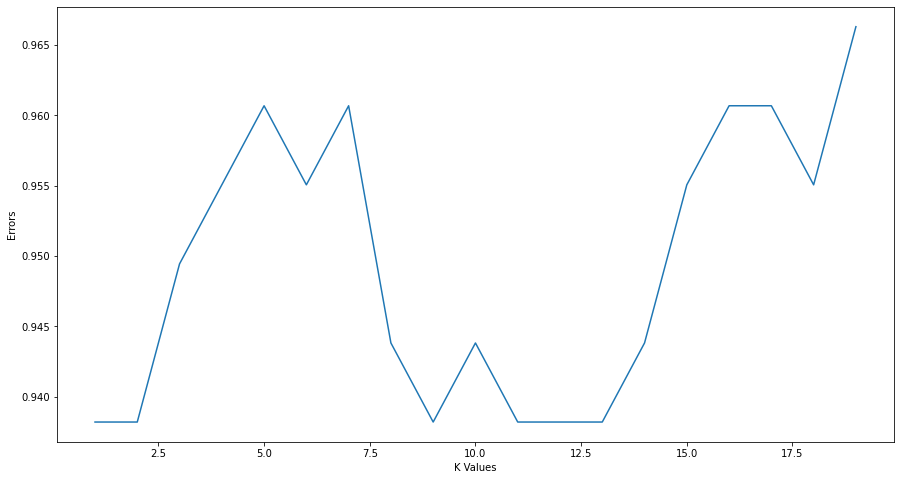

In [43]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8

plt.plot(k, test)
plt.xlabel('K Values')
plt.ylabel('Errors')

# Random Forest Classifier

In [44]:

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

#Train the model
clf.fit(X_train,y_train)

pred_rand=clf.predict(X_test)
print("Accuracy of Random Forest is:",metrics.accuracy_score(y_test, pred_rand)*100)


Accuracy of Random Forest is: 8.426966292134832
